In [101]:
import pandas as pd
import numpy as np

In [102]:
youtube = pd.read_csv("YoutubeSentiment.csv")

youtube['YOUTUBE'] = youtube['SENTIMENT']

columns_to_keep = ['DATE', 'YOUTUBE'] 

youtube = youtube[columns_to_keep]

youtube['DATE'] = pd.to_datetime(youtube['DATE'], format='%d-%m-%Y', dayfirst=True)

youtube['DATE_YT'] = youtube['DATE'] 

youtube_weekly = youtube.resample('W', on='DATE_YT').mean()

youtube_weekly.index = youtube_weekly.index.strftime('%Y-%m-%d') + '/' + (youtube_weekly.index + pd.DateOffset(days=6)).strftime('%Y-%m-%d')

youtube_weekly.reset_index(inplace=True)
columns_to_keep = ['DATE_YT', 'YOUTUBE'] 
youtube_weekly = youtube_weekly[columns_to_keep]

youtube_weekly['ID'] = range(4,len(youtube_weekly['YOUTUBE'])+4)

youtube_weekly = youtube_weekly.iloc[:-4]


data = {'YOUTUBE': [np.nan, np.nan, np.nan],
        'ID': [1, 2, 3]}

df = pd.DataFrame(data)


youtube_weekly = pd.concat([df, youtube_weekly], axis=0)

In [103]:

ANN = pd.read_csv("week_av_nn.csv")
SNP = pd.read_csv("tesla_minus_snp500_weekly.csv")

SNP['PRICE'] = SNP['Close_x']

ANN = ANN.iloc[1:-2]

ANN['ANN'] = ANN['SENTIMENT_PRED']

columns_to_keep = ['DATE', 'SENTIMENT', 'ANN'] 
ANN = ANN[columns_to_keep]

ANN['ID'] = range(1,len(ANN['ANN'])+1)


ANN_YT = pd.merge(ANN, youtube_weekly, on='ID')

ANN_YT_SP = pd.concat([ANN_YT, SNP['PRICE']], axis=1)

columns_to_keep = ['DATE', 'SENTIMENT', 'ANN', 'YOUTUBE', 'PRICE'] 
ANN_YT_SP = ANN_YT_SP[columns_to_keep]


In [104]:
svm_reg = pd.read_csv("svm_model_predictions.csv")

svm_reg['SVM_REG'] = svm_reg['svm_model_predictions']
svm_reg['DATE_SVM'] = svm_reg['DATE']

columns_to_keep = ['DATE_SVM', 'SVM_REG'] 

svm_reg = svm_reg[columns_to_keep]

svm_reg['DATE_SVM'] = pd.to_datetime(svm_reg['DATE_SVM'])

specific_date = pd.to_datetime('2022-01-01')
svm_reg = svm_reg[svm_reg['DATE_SVM'] >= specific_date]

svm_reg_weekly = svm_reg.resample('W', on='DATE_SVM').mean()

svm_reg_weekly.index = svm_reg_weekly.index.strftime('%Y-%m-%d') + '/' + (svm_reg_weekly.index + pd.DateOffset(days=6)).strftime('%Y-%m-%d')

svm_reg_weekly.reset_index(inplace=True)

svm_reg_weekly = svm_reg_weekly.iloc[:-3]


ANN_YT_SP_SVMREG = pd.concat([ANN_YT_SP,svm_reg_weekly['SVM_REG']], axis=1)



In [105]:
VADER = pd.read_csv("ArticleVADER.csv")

VADER['VADER'] = VADER['phrase_score']
VADER['DATE_VADER'] = VADER['DATE']

columns_to_keep = ['DATE_VADER', 'SENTIMENT','VADER'] 

VADER = VADER[columns_to_keep]

In [106]:
VADER['DATE_VADER'] = pd.to_datetime(VADER['DATE_VADER'], format='%d-%m-%Y', dayfirst=True)

specific_date = pd.to_datetime('2022-01-01')
VADER = VADER[VADER['DATE_VADER'] >= specific_date]

VADER_weekly = VADER.resample('W', on='DATE_VADER').mean()

VADER_weekly.index = VADER_weekly.index.strftime('%Y-%m-%d') + '/' + (VADER_weekly.index + pd.DateOffset(days=6)).strftime('%Y-%m-%d')

VADER_weekly.reset_index(inplace=True)

VADER_weekly = VADER_weekly.iloc[:-3]

MERGED = pd.concat([ANN_YT_SP_SVMREG,VADER_weekly['VADER']], axis=1)


In [107]:
LOGSVM = pd.read_csv("LOG_AND_SVM_SENTIMENT.csv")

LOGSVM['SVM_CLA'] = LOGSVM['SVM_SENTIMENT']
LOGSVM['LOGISTIC'] = LOGSVM['LOGISTIC_SENTIMENT']
LOGSVM['DATE_LOGSVM'] = LOGSVM['DATE']

columns_to_keep = ['DATE_LOGSVM', 'SENTIMENT','LOGISTIC','SVM_CLA'] 

LOGSVM = LOGSVM[columns_to_keep]

In [108]:
LOGSVM['DATE_LOGSVM'] = pd.to_datetime(LOGSVM['DATE_LOGSVM'], format='%d-%m-%Y', dayfirst=True)

specific_date = pd.to_datetime('2022-01-01')
LOGSVM = LOGSVM[LOGSVM['DATE_LOGSVM'] >= specific_date]

LOGSVM_weekly = LOGSVM.resample('W', on='DATE_LOGSVM').mean()

LOGSVM_weekly.index = LOGSVM_weekly.index.strftime('%Y-%m-%d') + '/' + (LOGSVM_weekly.index + pd.DateOffset(days=6)).strftime('%Y-%m-%d')

LOGSVM_weekly.reset_index(inplace=True)

LOGSVM_weekly = LOGSVM_weekly.iloc[1:-2]

columns_to_keep = ['LOGISTIC','SVM_CLA'] 

LOGSVM_weekly = LOGSVM_weekly[columns_to_keep]

MERGED_ALL = pd.concat([LOGSVM_weekly.reset_index(drop=True), MERGED.reset_index(drop=True)], axis=1)


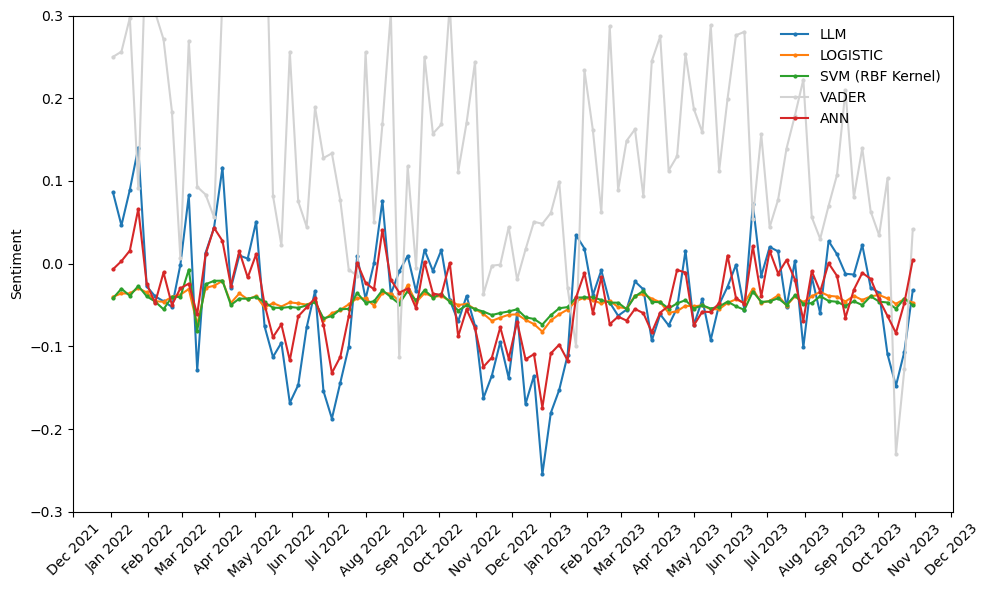

In [110]:
import pandas as pd
import matplotlib.pyplot as plt

PLOT_DF = MERGED_ALL
# Convert 'Week' column to datetime and extract start date of the week
PLOT_DF['Week'] = pd.to_datetime(PLOT_DF['DATE'].str.split('/').str[0])

# Set the 'Week' column as the index
PLOT_DF.set_index('Week', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(PLOT_DF.index, PLOT_DF['SENTIMENT'], marker='o', markersize = 2, label = 'LLM')
plt.plot(PLOT_DF.index, PLOT_DF['LOGISTIC'], marker='o', markersize=2, label='LOGISTIC')
plt.plot(PLOT_DF.index, PLOT_DF['SVM_CLA'], marker='o', markersize=2, label='SVM (RBF Kernel)')
#plt.plot(PLOT_DF.index, PLOT_DF['SVM_REG'], marker='o', markersize=2, label='SVM REGRESSION')
plt.plot(PLOT_DF.index, PLOT_DF['VADER'], marker='o', markersize=2, label='VADER', color='lightgray')
plt.plot(PLOT_DF.index, PLOT_DF['ANN'], marker='o', markersize=2, label='ANN')


# Set x-axis to show months
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.ylim(-0.3, 0.3)
plt.xlabel('')
plt.ylabel('Sentiment')
plt.title('')
plt.xticks(rotation=45)
plt.legend(loc='upper right', frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()


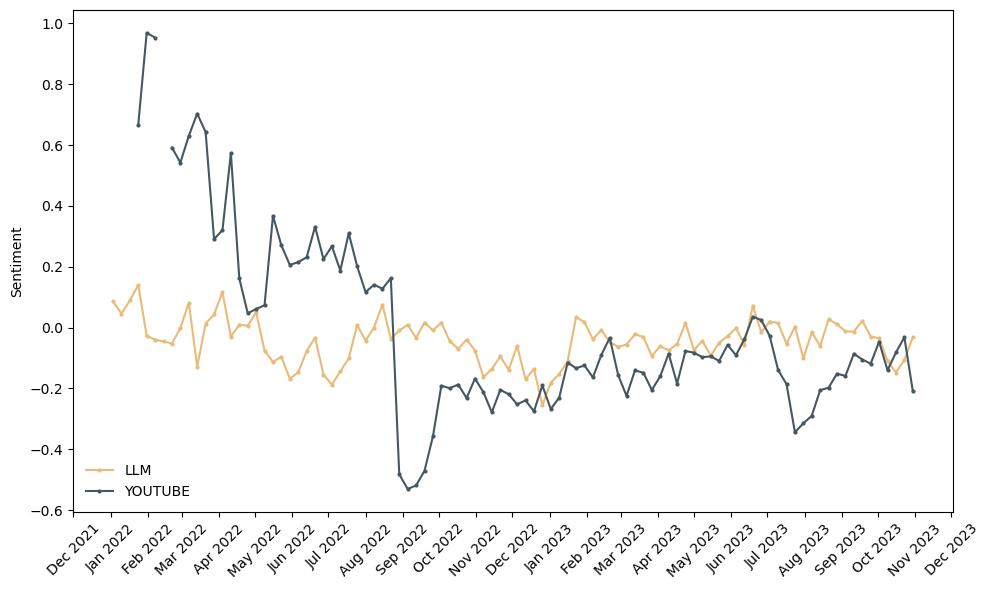

In [90]:
import pandas as pd
import matplotlib.pyplot as plt

PLOT_DF = MERGED_ALL
# Convert 'Week' column to datetime and extract start date of the week
PLOT_DF['Week'] = pd.to_datetime(PLOT_DF['DATE'].str.split('/').str[0])

# Set the 'Week' column as the index
PLOT_DF.set_index('Week', inplace=True)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(PLOT_DF.index, PLOT_DF['SENTIMENT'], marker='o', markersize = 2, label = 'LLM', color = "#EABA79")
plt.plot(PLOT_DF.index, PLOT_DF['YOUTUBE'], marker='o', markersize=2, label='YOUTUBE', color = "#455761")



# Set x-axis to show months
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xlabel('')
plt.ylabel('Sentiment')
plt.title('')
plt.xticks(rotation=45)
plt.legend(loc='lower left', frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()


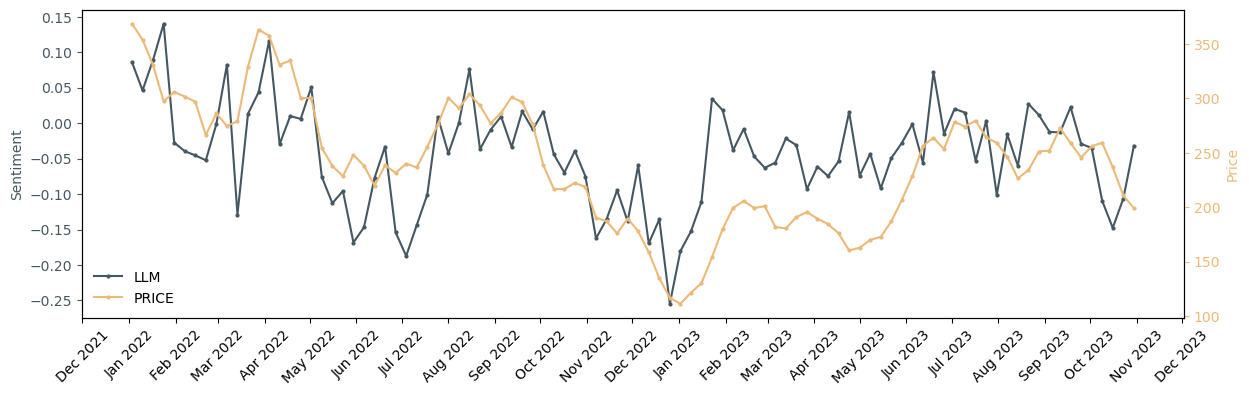

In [126]:
import pandas as pd
import matplotlib.pyplot as plt

PLOT_DF = MERGED_ALL
# Convert 'Week' column to datetime and extract start date of the week
PLOT_DF['Week'] = pd.to_datetime(PLOT_DF['DATE'].str.split('/').str[0])

# Set the 'Week' column as the index
PLOT_DF.set_index('Week', inplace=True)

# Plotting
fig, ax1 = plt.subplots(figsize=(14.22, 4))

# Plot 'SENTIMENT' on the left y-axis with color for 'PRICE'
ax1.plot(PLOT_DF.index, PLOT_DF['SENTIMENT'], marker='o', markersize=2, label='LLM', color="#455761")
ax1.set_ylabel('Sentiment', color="#455761")
ax1.tick_params(axis='y', colors="#455761")

# Set x-axis to show months and rotate ticks
ax1.xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
ax1.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xlabel('')
plt.xticks(rotation=45)  # Rotate x-axis ticks here

# Create a twin y-axis
ax2 = ax1.twinx()

# Plot 'PRICE' on the right y-axis with color for 'SENTIMENT'
ax2.plot(PLOT_DF.index, PLOT_DF['PRICE'], marker='o', markersize=2, label='PRICE', color="#EABA79")
ax2.set_ylabel('Price', color="#EABA79")
ax2.tick_params(axis='y', colors="#EABA79")

# Set legends
lines = ax1.get_lines() + ax2.get_lines()
ax1.legend(lines, [line.get_label() for line in lines], loc='lower left', frameon=False)

plt.title('')
plt.grid(False)


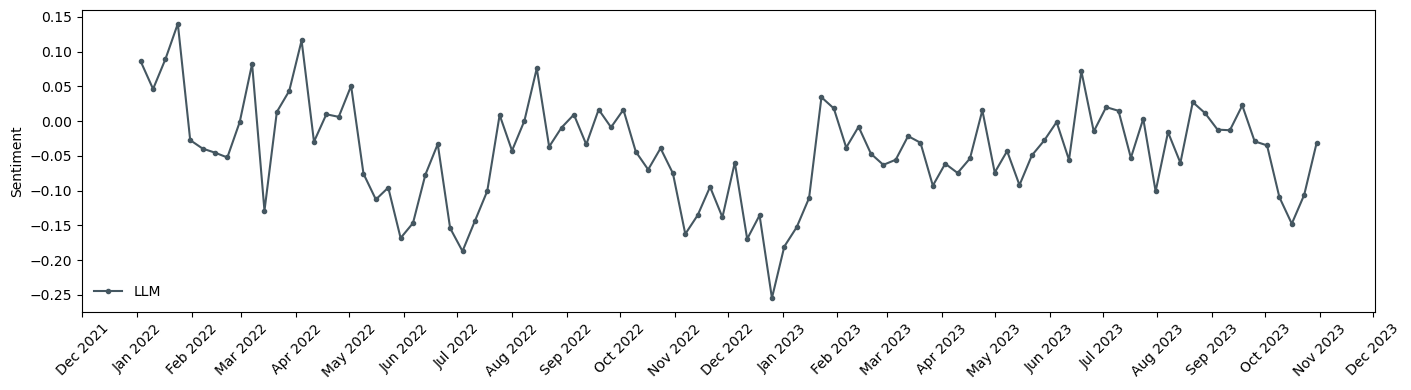

In [125]:
import pandas as pd
import matplotlib.pyplot as plt

PLOT_DF = MERGED_ALL
# Convert 'Week' column to datetime and extract start date of the week
PLOT_DF['Week'] = pd.to_datetime(PLOT_DF['DATE'].str.split('/').str[0])

# Set the 'Week' column as the index
PLOT_DF.set_index('Week', inplace=True)

# Plotting
plt.figure(figsize=(14.22, 4))
plt.plot(PLOT_DF.index, PLOT_DF['SENTIMENT'], marker='o', markersize = 3, label = 'LLM', color = "#455761")



# Set x-axis to show months
plt.gca().xaxis.set_major_locator(plt.matplotlib.dates.MonthLocator())
plt.gca().xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%b %Y'))
plt.xlabel('')
plt.ylabel('Sentiment')
plt.title('')
plt.xticks(rotation=45)
plt.legend(loc='lower left', frameon=False)
plt.grid(False)
plt.tight_layout()
plt.show()
